In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

In [2]:
def get_soup(u):
    r = requests.get(u,headers=HEADERS)
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup
review_list=[]


In [3]:
# Function : used to look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'title': item.find('a', {'class': 'a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold'}).text.strip(),
            'rating':float(item.find('i', {"data-hook":"review-star-rating"}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('div', {'class': 'a-row a-spacing-small review-data'}).text.strip(),
            }
            review_list.append(review)
    except:
        pass

In [4]:
HEADERS = ({'User-Agent':
            'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
            AppleWebKit/537.36 (KHTML, like Gecko) \
            Chrome/90.0.4430.212 Safari/537.36',
            'Accept-Language': 'en-US, en;q=0.5'})
for x in range(0,500):
    soup = get_soup(f'https://www.amazon.com/Umbra-Conceal-Floating-Bookshelf-Large/product-reviews/B0053GBC4E/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(soup)
    print(f'Getting page: {x}')
    get_reviews(soup)
    print(len(review_list))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

Getting page: 0
10
Getting page: 1
20
Getting page: 2
30
Getting page: 3
40
Getting page: 4
50
Getting page: 5
60
Getting page: 6
70
Getting page: 7
80
Getting page: 8
90
Getting page: 9
100
Getting page: 10
110
Getting page: 11
120
Getting page: 12
130
Getting page: 13
140
Getting page: 14
150
Getting page: 15
160
Getting page: 16
170
Getting page: 17
180
Getting page: 18
190
Getting page: 19
200
Getting page: 20
210
Getting page: 21
220
Getting page: 22
230
Getting page: 23
240
Getting page: 24
250
Getting page: 25
260
Getting page: 26
270
Getting page: 27
280
Getting page: 28
290
Getting page: 29
300
Getting page: 30
310
Getting page: 31
320
Getting page: 32
330
Getting page: 33
340
Getting page: 34
350
Getting page: 35
360
Getting page: 36
370
Getting page: 37
380
Getting page: 38
390
Getting page: 39
400
Getting page: 40
410
Getting page: 41
420
Getting page: 42
430
Getting page: 43
440
Getting page: 44
450
Getting page: 45
460
Getting page: 46
470
Getting page: 47
480
Getting pag

In [5]:
df2 = pd.DataFrame(review_list)
df2



,title,rating,body
0,One of my favorite Amazon purchases ever!,5.0,These are so much fun! We ordered the small si...
1,As expected but doesn’t fit standard hardcover,4.0,Let me start by saying I’ve got a Master’s deg...
2,Happy mom day to me,5.0,These are awesome! I should’ve bought the smal...
3,Perfect for Sonos One,5.0,I wanted to mount a Sonos speaker in my bathro...
4,Very sturdy even after multiple moves and 5 ye...,5.0,I love these floating bookshelves. They give a...
...,...,...,...
1417,Awesome floating shelf,5.0,This is an shelf and decorator piece. Works p...
1418,My new fav,5.0,"I purchased this on a whim, thinking if I didn..."
1419,great gifts!,5.0,I bought a half dozen of these for my new hous...
1420,Very unique shelf,5.0,"I love this shelf, it is unique and my friends..."


In [6]:
df2.describe()

,rating
count,1422.000000
mean,4.606188
std,0.863468
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [7]:
df2['title'].nunique()


1063

In [8]:
df2['body'].nunique()


1397

In [9]:
df2 = pd.DataFrame(review_list)
df2.to_csv(r'az_bookshelf.csv', index=False)
df2

,title,rating,body
0,One of my favorite Amazon purchases ever!,5.0,These are so much fun! We ordered the small si...
1,As expected but doesn’t fit standard hardcover,4.0,Let me start by saying I’ve got a Master’s deg...
2,Happy mom day to me,5.0,These are awesome! I should’ve bought the smal...
3,Perfect for Sonos One,5.0,I wanted to mount a Sonos speaker in my bathro...
4,Very sturdy even after multiple moves and 5 ye...,5.0,I love these floating bookshelves. They give a...
...,...,...,...
1417,Awesome floating shelf,5.0,This is an shelf and decorator piece. Works p...
1418,My new fav,5.0,"I purchased this on a whim, thinking if I didn..."
1419,great gifts!,5.0,I bought a half dozen of these for my new hous...
1420,Very unique shelf,5.0,"I love this shelf, it is unique and my friends..."


In [10]:

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
import re
import string
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to C:\Users\Sainath A
[nltk_data]     R\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
def classify(x):
    if x == 5.0 or x==4.0:
        return 2
    if x==3.0:
        return 1 
    return 0

In [12]:
def clean_dataframe(df2):
  # creates new column with corresponding class labels, the output variable().
  df2['y'] = df2['rating'].apply(classify)


In [13]:
clean_dataframe(df2)

In [14]:
df2

,title,rating,body,y
0,One of my favorite Amazon purchases ever!,5.0,These are so much fun! We ordered the small si...,2
1,As expected but doesn’t fit standard hardcover,4.0,Let me start by saying I’ve got a Master’s deg...,2
2,Happy mom day to me,5.0,These are awesome! I should’ve bought the smal...,2
3,Perfect for Sonos One,5.0,I wanted to mount a Sonos speaker in my bathro...,2
4,Very sturdy even after multiple moves and 5 ye...,5.0,I love these floating bookshelves. They give a...,2
...,...,...,...,...
1417,Awesome floating shelf,5.0,This is an shelf and decorator piece. Works p...,2
1418,My new fav,5.0,"I purchased this on a whim, thinking if I didn...",2
1419,great gifts!,5.0,I bought a half dozen of these for my new hous...,2
1420,Very unique shelf,5.0,"I love this shelf, it is unique and my friends...",2


In [15]:
df2.describe()

,rating,y
count,1422.000000,1422.000000
mean,4.606188,1.864276
std,0.863468,0.461620
min,1.000000,0.000000
25%,5.000000,2.000000
50%,5.000000,2.000000
75%,5.000000,2.000000
max,5.000000,2.000000


In [16]:
df2['body']


0       These are so much fun! We ordered the small si...
1       Let me start by saying I’ve got a Master’s deg...
2       These are awesome! I should’ve bought the smal...
3       I wanted to mount a Sonos speaker in my bathro...
4       I love these floating bookshelves. They give a...
                              ...                        
1417    This is an  shelf and decorator piece. Works p...
1418    I purchased this on a whim, thinking if I didn...
1419    I bought a half dozen of these for my new hous...
1420    I love this shelf, it is unique and my friends...
1421    This is a great product. I bought it at Linens...
Name: body, Length: 1422, dtype: object

In [17]:
# removes all the punctuations ie '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
import string
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct

In [18]:
def text_process(df):
    df['body']=df['body'].apply(lambda x: remove_punctuation(x.lower())) # Removing all the punctuations from the words, and changing the words to lower case to maintain uniformity
    stemmer = PorterStemmer() # stemming
    words = stopwords.words("english") # stop words example: "the, I, our etc"
    df['cleaned_reviews']= df['body'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
    return df

In [19]:
text_process(df2)


,title,rating,body,y,cleaned_reviews
0,One of my favorite Amazon purchases ever!,5.0,these are so much fun we ordered the small siz...,2,much fun order small size fit standard hardbac...
1,As expected but doesn’t fit standard hardcover,4.0,let me start by saying i’ve got a master’s deg...,2,let start say got master degre english clearli...
2,Happy mom day to me,5.0,these are awesome i should’ve bought the small...,2,awesom bought small mani larg book use conceal...
3,Perfect for Sonos One,5.0,i wanted to mount a sonos speaker in my bathro...,2,want mount sono speaker bathroom drill marbl t...
4,Very sturdy even after multiple moves and 5 ye...,5.0,i love these floating bookshelves they give a ...,2,love float bookshelv give magic feel room boug...
...,...,...,...,...,...
1417,Awesome floating shelf,5.0,this is an shelf and decorator piece works pe...,2,shelf decor piec work perfectli cumbersom shel...
1418,My new fav,5.0,i purchased this on a whim thinking if i didnt...,2,purchas whim think didnt like could put offic ...
1419,great gifts!,5.0,i bought a half dozen of these for my new hous...,2,bought half dozen new hous id want forev came ...
1420,Very unique shelf,5.0,i love this shelf it is unique and my friends ...,2,love shelf uniqu friend alway amus bought one ...


In [20]:
df2['body'],df2['cleaned_reviews']


(0       these are so much fun we ordered the small siz...
 1       let me start by saying i’ve got a master’s deg...
 2       these are awesome i should’ve bought the small...
 3       i wanted to mount a sonos speaker in my bathro...
 4       i love these floating bookshelves they give a ...
                               ...                        
 1417    this is an  shelf and decorator piece works pe...
 1418    i purchased this on a whim thinking if i didnt...
 1419    i bought a half dozen of these for my new hous...
 1420    i love this shelf it is unique and my friends ...
 1421    this is a great product i bought it at linensn...
 Name: body, Length: 1422, dtype: object,
 0       much fun order small size fit standard hardbac...
 1       let start say got master degre english clearli...
 2       awesom bought small mani larg book use conceal...
 3       want mount sono speaker bathroom drill marbl t...
 4       love float bookshelv give magic feel room boug...
              

In [21]:
new_df = pd.DataFrame(df2)
new_df.to_csv(r'updated_dataset.csv', index=False)

In [22]:
new_df

,title,rating,body,y,cleaned_reviews
0,One of my favorite Amazon purchases ever!,5.0,these are so much fun we ordered the small siz...,2,much fun order small size fit standard hardbac...
1,As expected but doesn’t fit standard hardcover,4.0,let me start by saying i’ve got a master’s deg...,2,let start say got master degre english clearli...
2,Happy mom day to me,5.0,these are awesome i should’ve bought the small...,2,awesom bought small mani larg book use conceal...
3,Perfect for Sonos One,5.0,i wanted to mount a sonos speaker in my bathro...,2,want mount sono speaker bathroom drill marbl t...
4,Very sturdy even after multiple moves and 5 ye...,5.0,i love these floating bookshelves they give a ...,2,love float bookshelv give magic feel room boug...
...,...,...,...,...,...
1417,Awesome floating shelf,5.0,this is an shelf and decorator piece works pe...,2,shelf decor piec work perfectli cumbersom shel...
1418,My new fav,5.0,i purchased this on a whim thinking if i didnt...,2,purchas whim think didnt like could put offic ...
1419,great gifts!,5.0,i bought a half dozen of these for my new hous...,2,bought half dozen new hous id want forev came ...
1420,Very unique shelf,5.0,i love this shelf it is unique and my friends ...,2,love shelf uniqu friend alway amus bought one ...


In [23]:
new_df.isna().sum()

title              0
rating             0
body               0
y                  0
cleaned_reviews    0
dtype: int64

In [24]:
# Changes the overall category 
new_df["classes"] = new_df["rating"]
new_df["classes"].replace({5.0: "good",4.0:"good",3.0:"moderate",2.0:"bad",1.0:"bad"}, inplace=True)
new_df["classes"].unique()

array(['good', 'bad', 'moderate'], dtype=object)

In [25]:
new_df

,title,rating,body,y,cleaned_reviews,classes
0,One of my favorite Amazon purchases ever!,5.0,these are so much fun we ordered the small siz...,2,much fun order small size fit standard hardbac...,good
1,As expected but doesn’t fit standard hardcover,4.0,let me start by saying i’ve got a master’s deg...,2,let start say got master degre english clearli...,good
2,Happy mom day to me,5.0,these are awesome i should’ve bought the small...,2,awesom bought small mani larg book use conceal...,good
3,Perfect for Sonos One,5.0,i wanted to mount a sonos speaker in my bathro...,2,want mount sono speaker bathroom drill marbl t...,good
4,Very sturdy even after multiple moves and 5 ye...,5.0,i love these floating bookshelves they give a ...,2,love float bookshelv give magic feel room boug...,good
...,...,...,...,...,...,...
1417,Awesome floating shelf,5.0,this is an shelf and decorator piece works pe...,2,shelf decor piec work perfectli cumbersom shel...,good
1418,My new fav,5.0,i purchased this on a whim thinking if i didnt...,2,purchas whim think didnt like could put offic ...,good
1419,great gifts!,5.0,i bought a half dozen of these for my new hous...,2,bought half dozen new hous id want forev came ...,good
1420,Very unique shelf,5.0,i love this shelf it is unique and my friends ...,2,love shelf uniqu friend alway amus bought one ...,good


In [26]:
new_df2 = pd.DataFrame(new_df)
new_df2.to_csv(r'rd_update.csv', index=False)

In [27]:
import spacy
import en_core_web_sm
nlp = spacy.load("en_core_web_sm")

In [28]:
def normalize(msg):
    msg = re.sub('[^A-Za-z]+', ' ', msg) #remove special character and intergers
    doc = nlp(msg)
    res=[]
    for token in doc:
        if(token.is_stop or token.is_punct or token.is_currency or token.is_space or len(token.text) <= 2): #word filteration
            pass
        else:
            res.append(token.lemma_.lower())
    return res

new_df["cleaned_reviews_1"] = new_df["cleaned_reviews"].apply(normalize)
new_df

,title,rating,body,y,cleaned_reviews,classes,cleaned_reviews_1
0,One of my favorite Amazon purchases ever!,5.0,these are so much fun we ordered the small siz...,2,much fun order small size fit standard hardbac...,good,"[fun, order, small, size, fit, standard, hardb..."
1,As expected but doesn’t fit standard hardcover,4.0,let me start by saying i’ve got a master’s deg...,2,let start say got master degre english clearli...,good,"[let, start, get, master, degre, english, clea..."
2,Happy mom day to me,5.0,these are awesome i should’ve bought the small...,2,awesom bought small mani larg book use conceal...,good,"[awesom, buy, small, mani, larg, book, use, co..."
3,Perfect for Sonos One,5.0,i wanted to mount a sonos speaker in my bathro...,2,want mount sono speaker bathroom drill marbl t...,good,"[want, mount, sono, speaker, bathroom, drill, ..."
4,Very sturdy even after multiple moves and 5 ye...,5.0,i love these floating bookshelves they give a ...,2,love float bookshelv give magic feel room boug...,good,"[love, float, bookshelv, magic, feel, room, bu..."
...,...,...,...,...,...,...,...
1417,Awesome floating shelf,5.0,this is an shelf and decorator piece works pe...,2,shelf decor piec work perfectli cumbersom shel...,good,"[shelf, decor, piec, work, perfectli, cumberso..."
1418,My new fav,5.0,i purchased this on a whim thinking if i didnt...,2,purchas whim think didnt like could put offic ...,good,"[purchas, whim, think, like, offic, sight, lov..."
1419,great gifts!,5.0,i bought a half dozen of these for my new hous...,2,bought half dozen new hous id want forev came ...,good,"[buy, half, dozen, new, hous, want, forev, com..."
1420,Very unique shelf,5.0,i love this shelf it is unique and my friends ...,2,love shelf uniqu friend alway amus bought one ...,good,"[love, shelf, uniqu, friend, alway, amus, buy,..."


In [60]:
# words count
from collections import Counter
words_collection = Counter([words for subtext in new_df['cleaned_reviews_1'] for words in subtext])
most_common = pd.DataFrame(words_collection.most_common(1000))
most_common.columns = ['most_common','count']
most_common

,most_common,count
0,book,1548
1,look,548
2,wall,446
3,great,444
4,shelf,433
...,...,...
995,technolog,2
996,pass,2
997,folk,2
998,pencil,2


In [61]:
most_comn = pd.DataFrame(most_common)
most_comn.to_csv(r'most_common.csv', index=False)

In [65]:
words= most_common['most_common']

In [66]:
word_list = ' '.join(words)

In [67]:
#plotting wordcloud for most common words 
wordcloud = WordCloud(background_color='black',width=2000,height=2000).generate(word_list)


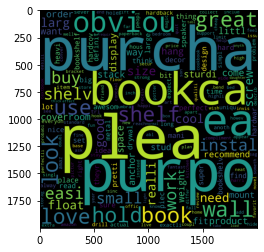

In [68]:
plt.imshow(wordcloud)

In [69]:
import matplotlib.pyplot
import seaborn as sns
%matplotlib inline

In [70]:
new_df['classes'].describe()

count     1422
unique       3
top       good
freq      1297
Name: classes, dtype: object

In [71]:
new_df['classes'].value_counts()

good        1297
bad           68
moderate      57
Name: classes, dtype: int64

(array([1297.,    0.,    0.,    0.,    0.,   68.,    0.,    0.,    0.,
          57.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

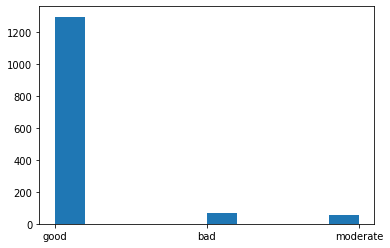

In [72]:
#plotting histogram for classes
plt.hist(new_df['classes'])

<AxesSubplot:ylabel='classes'>

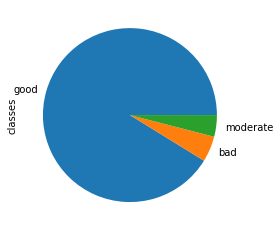

In [73]:
#plotting piechart for classes
new_df['classes'].value_counts().plot(kind="pie")

In [74]:
new_df['rating'].describe()

count    1422.000000
mean        4.606188
std         0.863468
min         1.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

In [75]:
new_df['rating'].value_counts()

5.0    1088
4.0     209
3.0      57
2.0      35
1.0      33
Name: rating, dtype: int64

(array([  33.,    0.,   35.,    0.,    0.,   57.,    0.,  209.,    0.,
        1088.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

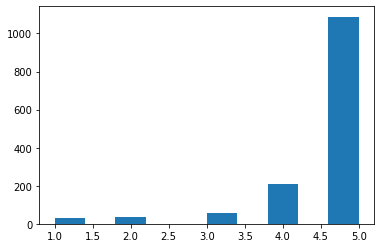

In [76]:
#plotting histogram for rating
plt.hist(new_df['rating'])

<AxesSubplot:ylabel='rating'>

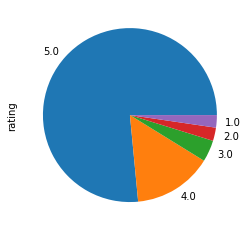

In [77]:
#plotting piechart for rating
new_df['rating'].value_counts().plot(kind="pie")

<AxesSubplot:xlabel='rating'>

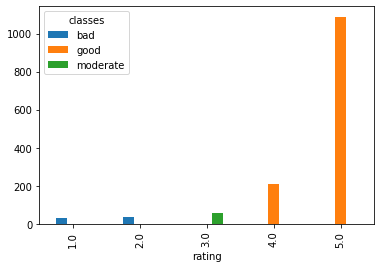

In [78]:
# bar plot between rating and classes  
pd.crosstab(new_df.rating,new_df.classes).plot(kind="bar")

<AxesSubplot:title={'center':'50 Commonly used words'}, xlabel='most_common'>

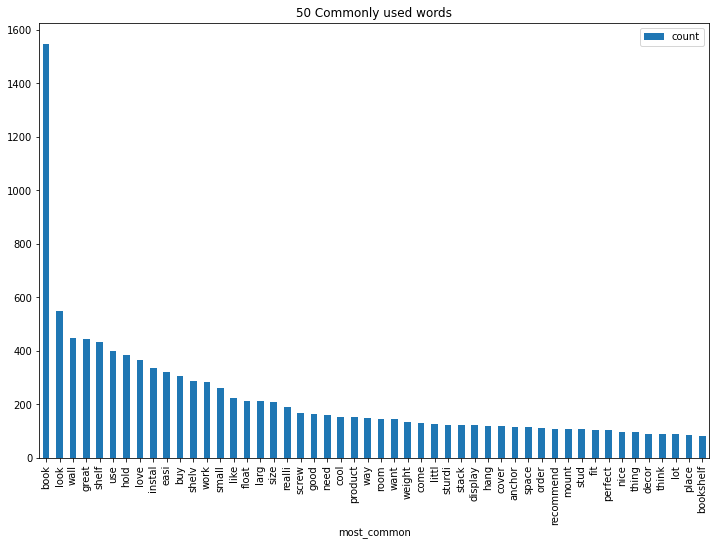

In [80]:
#plotting bar graph for top 10 most common words

most_common[0:50].plot.bar(x='most_common',figsize=(12,8),title='50 Commonly used words')

In [110]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis('off')

In [111]:
words= most_common['most_common']
words_= ' '.join(words)

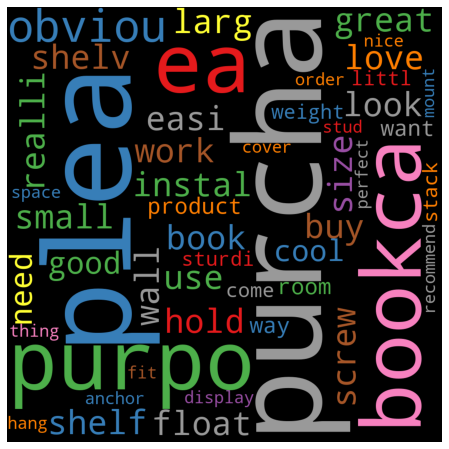

In [112]:
wordcloud=WordCloud(width=1000,height=1000,background_color='black',max_words=50,
                   colormap='Set1').generate(words_)
plot_cloud(wordcloud)

In [115]:
def percentage_ratings(data, category):
    return (len(data[data["classes"] == category])/len(data)) * 100

In [116]:
print(f"Percentage of Good words  {percentage_ratings(new_df, 'good')} %")
print(f"Percentage of moderate words  {percentage_ratings(new_df, 'moderate')} %")
print(f"Percentage of bad words  {percentage_ratings(new_df, 'bad')} %")

Percentage of Good words  91.20956399437412 %
Percentage of moderate words  4.008438818565401 %
Percentage of bad words  4.781997187060478 %
